### Задание 1

Ответьте на следующие вопросы:
 - Как критики относятся к спортивным играм?
 - Критикам нравятся больше игры на PC или на PS4?
 - Критикам больше нравятся стрелялки или стратегии?

Для каждого вопроса:
 * сформулируйте нулевую и альтернативную гипотезы;
 * выберите пороговый уровень статистической значимости;
 * опишите полученные результаты статистического теста.

In [24]:
import pandas as pd
import matplotlib.pyplot as plt  

In [131]:
df = pd.read_csv('vgsales.csv')

##### Как критики относятся к спортивным играм?

    Критики относятся к спортивным играм положительно или отрицательно.
    
 * H0 средняя оценка критиков <= 70
 * H1 средняя оценка критиков > 70

alfa = 0.05



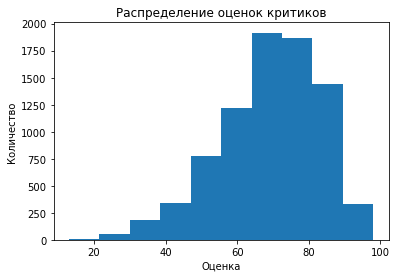

In [132]:
plt.hist(df['Critic_Score'])

plt.title('Распределение оценок критиков')
plt.xlabel('Оценка')
plt.ylabel('Количество')

plt.show()

In [133]:
from scipy import stats as st
alpha = 0.05
t_score, p_value = st.ttest_1samp(df.dropna()['Critic_Score'], 70, alternative='greater')

print('mean Critic Score: ', round(df['Critic_Score'].mean(), 2))
print('t-score: ',round(t_score, 2) , 'p-value:', round(p_value, 4))

if p_value < alpha: 
    print('Отвергаем нулевую гипотезу, среднее больше 70 (критики относятся к спортивным играм положительно)')
else:
    print('Не отвергаем нулевую нулевую гипотезу, критики оносятся к спортивным играм ниже среднего')

mean Critic Score:  68.97
t-score:  1.62 p-value: 0.0526
Не отвергаем нулевую нулевую гипотезу, критики оносятся к спортивным играм ниже среднего


#### Критикам нравятся больше игры на PC или на PS4?

    Средняя отценка критиков выше для игр на PC в сравнеии с играми на PS4
    
 * H0 Средняя отценка для PC <= средней оценке для PS4
 * H1 Средняя отценка для PC > средней оценке для PS4

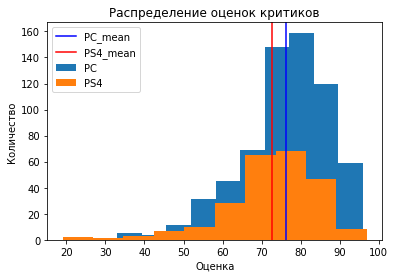

In [93]:
plt.hist(df.loc[df['Platform'] == 'PC'].dropna()['Critic_Score'], label='PC')
plt.hist(df.loc[df['Platform'] == 'PS4'].dropna()['Critic_Score'], label='PS4')
plt.axvline(df.loc[df['Platform'] == 'PC'].dropna()['Critic_Score'].mean(), color='b', label = 'PC_mean')
plt.axvline(df.loc[df['Platform'] == 'PS4'].dropna()['Critic_Score'].mean(), color='r', label = 'PS4_mean')

plt.title('Распределение оценок критиков')
plt.xlabel('Оценка')
plt.ylabel('Количество')
plt.legend()

plt.show()

In [55]:
print('PC mean', round(df.loc[df['Platform'] == 'PC'].dropna()['Critic_Score'].mean(), 2))
print('PS4 mean', round(df.loc[df['Platform'] == 'PS4'].dropna()['Critic_Score'].mean(), 2))

PC mean 76.26
PS4 mean 72.67


In [113]:
alpha = 0.05
t_score, p_value = st.ttest_ind(df.loc[df['Platform'] == 'PC'].dropna()['Critic_Score'],
                      df.loc[df['Platform'] == 'PS4'].dropna()['Critic_Score'], equal_var=False)

print('t-score: ',round(t_score, 2) , 'p-value:', round(p_value, 3))

if (p_value < alpha):
    print('Отвергаем нулевую гипотезу, средняя оценка критиков выше для игр на PC')
else:
    print('Не отвергаем нулевую гипотезу, средняя оценка критиков выше для игр на PS4')
    


t-score:  3.99 p-value: 0.0
Отвергаем нулевую гипотезу, средняя оценка критиков выше для игр на PC


In [112]:
print(result.pvalue) 

7.984874894502312e-05


#### Критикам больше нравятся стрелялки или стратегии?

    Средняя оценка критиков выше для Shooter или для Strategy
    
 * H0 Средняя оценка для Shooter >= средней оценке для Strategy
 * H1 Средняя оценка для Shooter < средней оценке для Strategy

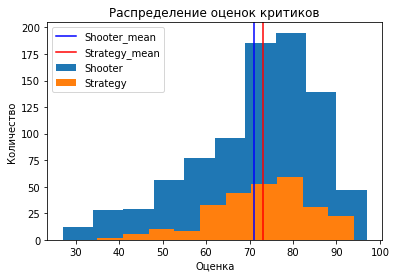

In [115]:
plt.hist(df.loc[df['Genre'] == 'Shooter'].dropna()['Critic_Score'], label='Shooter')
plt.hist(df.loc[df['Genre'] == 'Strategy'].dropna()['Critic_Score'], label='Strategy')
plt.axvline(df.loc[df['Genre'] == 'Shooter'].dropna()['Critic_Score'].mean(), color='b', label = 'Shooter_mean')
plt.axvline(df.loc[df['Genre'] == 'Strategy'].dropna()['Critic_Score'].mean(), color='r', label = 'Strategy_mean')

plt.title('Распределение оценок критиков')
plt.xlabel('Оценка')
plt.ylabel('Количество')
plt.legend()

plt.show()

In [116]:
print('Shooter mean: ', round(df.loc[df['Genre'] == 'Shooter'].dropna()['Critic_Score'].mean(), 2))
print('Strategy mean: ', round(df.loc[df['Genre'] == 'Strategy'].dropna()['Critic_Score'].mean(), 2))

Shooter mean:  70.98
Strategy mean:  73.12


In [118]:
alpha = 0.05
t_score, p_value = st.ttest_ind(df.loc[df['Genre'] == 'Strategy'].dropna()['Critic_Score'],
                      df.loc[df['Genre'] == 'Shooter'].dropna()['Critic_Score'], equal_var=False)

print('t-score: ',round(t_score, 2) , 'p-value:', round(p_value, 3))

if (p_value < alpha):
    print('Отвергаем нулевую гипотезу, средняя оценка критиков выше для игр Strategy')
else:
    print('Не отвергаем нулевую гипотезу, средняя оценка критиков выше для игр Shooter')

t-score:  2.5 p-value: 0.013
Отвергаем нулевую гипотезу, средняя оценка критиков выше для игр Strategy


### Задание 2

Реализуйте базовую модель логистической регрессии для классификации текстовых сообщений (используемые данные здесь) по признаку спама. Для этого:
 * Привидите весь текст к нижнему регистру;
 * Удалите мусорные символы;
 * Удалите стоп-слова;
 * Привидите все слова к нормальной форме;
 * Преобразуйте все сообщения в вектора TF-IDF. Вам поможет следующий код:

In [69]:
# импорт библиотек
import glob
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

import spacy


In [70]:
spacy.prefer_gpu()
nlp = spacy.load("en_core_web_sm")

In [71]:
stopwords_set = set(stopwords.words('english'))

In [72]:
def norm_msg (message):
    message = message.lower()
    message = re.sub('[\W_]+',' ', message)
    message = nlp(message)
    message = [token.lemma_ for token in message]
    message = [word for word in message if word not in stopwords_set]
    message = [wordnet_lemmatizer.lemmatize(word) for word in message]
    return ' '.join(message)

In [73]:
df = pd.read_csv('spam.csv')

 *  Привидите весь текст к нижнему регистру;
 * Удалите мусорные символы;

In [74]:
df['norm_msg']  = df['Message'].apply(norm_msg)


In [75]:
df.loc[df['Category']=='ham', 'cat'] = 1
df.loc[df['Category']=='spam', 'cat'] = 2

In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df['norm_msg'])
names = tfidf.get_feature_names()
tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=names)

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
X = tfidf_matrix
y = df['cat']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

y_pred = model.predict(X_test)

In [79]:
from sklearn.linear_model import LogisticRegression

In [80]:
logisticRegr = LogisticRegression(random_state=42)
logisticRegr.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [81]:
predictions = logisticRegr.predict(X_test)

In [82]:
predictions

array([1., 1., 1., ..., 1., 2., 1.])

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [84]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[1444    4]
 [  64  160]]
